# Projeto 2

Nome: Gabriela Duarte
    
Nome: Gustavo de Lorenzi Cancellier Katz

Nome: Mariana de Camargo Salles Cezar

## Contextualização 

Pokémon é uma franquia de mídia que foi criada em 1995, centrada em criaturas ficcionais chamadas "Pokémon" que os seres humanos capturam e os treinam para lutarem um contra o outro como um esporte.

Os jogos originais de Pokémon são com elementos de estratégia divididos por gerações. Essas gerações são cronologicamente divididas pelo seu lançamento; a cada determinado número de anos contendo novos Pokémon, personagens e conceitos de jogabilidade, aquela sequência é considerada o começo de uma nova geração da franquia. 

O objetivo do jogo é capturar todas as espécies de Pokémon disponíveis na região fictícia onde o jogo está configurado e completar a informação de todos os Pokémon no Pokédex. Por outro lado, eles devem ser treinados para enfrentar outros pokémon pertencentes a outros treinadores a fim de demonstrar suas habilidades, força, talento e assim se tornar um "Mestre de Pokémon". Para conseguir isso, o treinador viaja por todas as regiões do mundo dos Pokémon, coletando "insígnias de ginásio", que são obtidas após derrotar o respectivo Líderes de Ginásio, em uma batalha na qual ambos treinadores e o líder ginásio enfrentam seus Pokémon para testar suas habilidades especiais em uma batalha pokémon.

#### Dataset

O dataset utilizado no projeto contém a Pokédex  e apresenta as seguintes informações:

- "Abilities": habilidades
- Against Bug: contra lama   
- Against Dark: contra sombrio
- Against Dragon: contra dragão
- Against Electric: contra eletricidade
- Against Fairy: contra fada
- Against Fight: contra lutador
- Against Fire: contra fogo
- Against Flying: contra voador
- Against Ghost: contra fantasma
- Against Grass: contra grama
- Against Ground: contra 
- Against Ice: contra gelo
- Against Normal: contra normais
- Against Poison: contra veneno
- Against Psychic: contra
- Against Rock: contra pedra
- Against Steel: contra aço
- Against Water: contra água
- Attack: ataque
- Base Egg Steps: Quantos passos tem que dar para chocar o ovo
- Base Happiness: base de felicidade
- Base Total: base total
- Capture Rate: probabilidade de captura
- Classfication: classificação
- Defense: defesa 
- Experience Growth: taxa de experiência 
- Height M: altura macho 
- Hp: vida
- Japanese name: nome japones
- Name: nome
- Percentage male: porcentagem 
- Pokedex number: número na Pokedex
- Sp Attack: Ataque especial 
- Sp Defense: Defesa especial
- Speed: velocidade
- Type1: Tipo 1
- Type2: Tipo 2
- Weight kg: Peso em Kg
- Generation: geração
- Is legendary: é lendário?


Analisando essas informações seria possível observar padrões para ver o tipo 1(primário) dos pokemons. Dessa forma, os features serão as informações das colunas das relações da porcentagem de dano entre os tipos primários. 


Como o target do nosso projeto é uma variável qualitativa, será utilizado o método de **Classificadores**.

## Lendo o Dataset

#### Importando as bibliotecas necessárias

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report



# bibliotecas básicas para manipular qualquer modelo
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


# separador entre base de treino e de teste
from sklearn.model_selection import train_test_split

# ferramenta de normalização, essencial para o modelo
from sklearn.preprocessing import StandardScaler

# o modelo de classificação propriamente dito
from sklearn.neighbors import KNeighborsClassifier

# algumas funções para testar o modelo posteriormete:
# (explicadas no Turing Talks #11)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##### Verificando o diretório em que o arquivo está

In [2]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}! :)')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv! :)


#### Lendo o arquivo

In [3]:
df = pd.read_csv("pokemon.csv")
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


Pegando apenas os nomes das colunas:

In [4]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Preparação para a Análise 

Para começar fizemos o plot de relacionamentos entre pares de habilidades. Por padrão, esta função cria uma grade de eixos de forma que cada variável numérica seja compartilhada entre os eixos y em uma única linha e os eixos x em uma única coluna. Os gráficos diagonais são tratados de forma diferente: um gráfico de distribuição univariada é desenhado para mostrar a distribuição marginal dos dados em cada coluna.


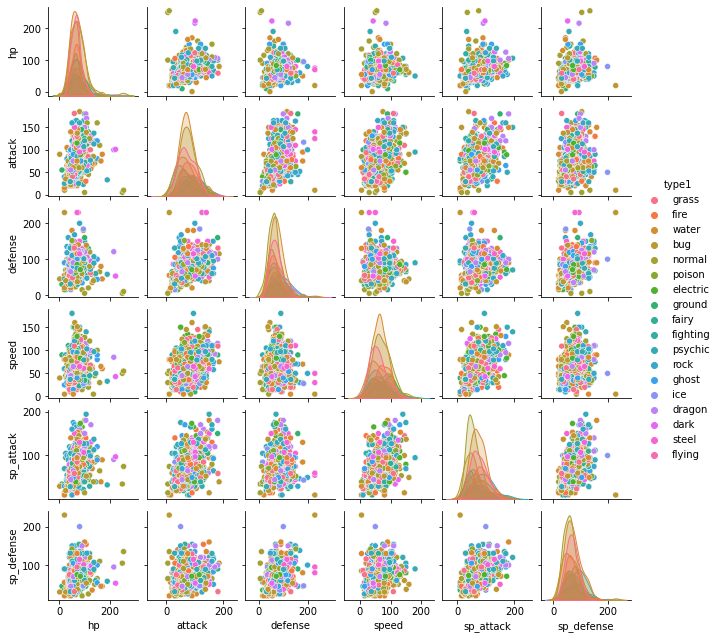

In [5]:
habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

sns.pairplot(habilidades, height=1.5, hue='type1');

Então foi feito umas contagem dos Pokemons de cada tipo de maneira decrescente

In [6]:
df.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

E foi utilizado este comando para observar as colunas incompletas, estas não serão utilizadas para a predição pois caso o código as vejam como relevante, quando elas estiverem faltando a uma maior chance de erro

In [7]:
df.isnull().sum().sort_values(ascending = False)[:5] 

type2              384
percentage_male     98
height_m            20
weight_kg           20
is_legendary         0
dtype: int64

# Modelando Previsões

Inicia-se criando uma lista com as variáveis de habilidade escolhidas dado a análise anterior

In [8]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]
x.head(2)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Árvore de decisão

A árvore de decisão é um algoritmo para classificação e regressão com estrutura semelhante a uma árvore. Normalmente começa com um único nó, que se ramifica em outras possibilidades. 

Ele se baseia em separar os dados dos dataframes de acordo com as características comuns que possuem e realiza diversas perguntas que são respondidas com sim ou não para todas as features do dataframe, categóricas ou numéricas e separando de acordo com as respostas e essas são realizadas até que o modelo probabilístico consiga tornar a amostra o mais pura.


Para a classificação os Pokemons, iremos usar a função DecisionTreeClassifier da biblioteca sklean.

In [10]:
model1 = DecisionTreeClassifier () 
m = model1.fit(x_train, y_train)

In [11]:
clf = x

iris = load_iris()
xclf, yclf = x, y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xclf, yclf)

Observe a árvore gerada pelo modelo:

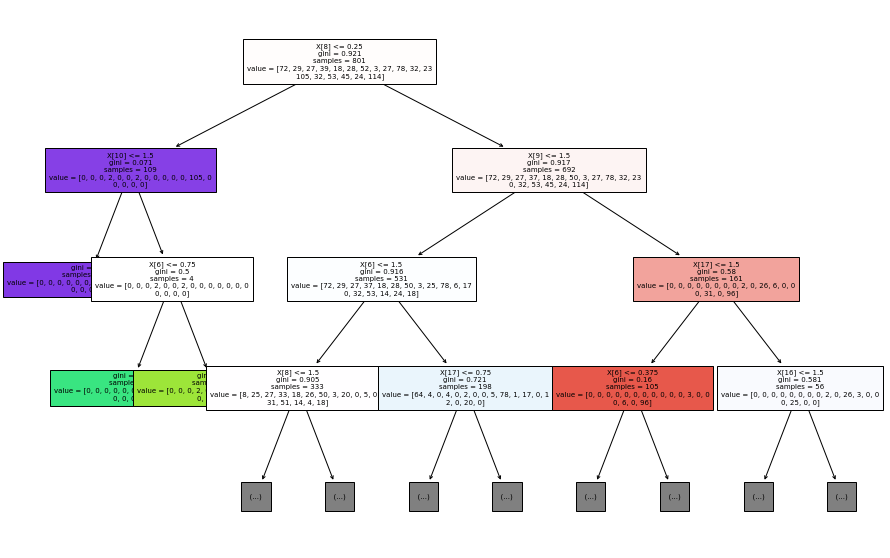

In [12]:
plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled = True, max_depth = 3, fontsize = 7);

#### Cálculo de precisão do modelo

Para calcular a precisão do modelo é utilizado o comando score que retorna a precisão média nos dados de teste e rótulos fornecidos.

In [13]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.9640625


In [14]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.906832298136646


In [15]:
Resultados = []
soma = 0

In [16]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = DecisionTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_train = m.score(x_test, y_test)
    
    Resultados.append(resultado_train)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name'])
# df1   
# m

In [17]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name    0.897516
dtype: float64 Column_Name    0.819876
dtype: float64 Column_Name    0.944099
dtype: float64 Column_Name    0.026804
dtype: float64


In [18]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bug       0.93      0.88      0.90        16
        dark       1.00      1.00      1.00         4
      dragon       0.67      0.57      0.62         7
    electric       1.00      1.00      1.00         6
       fairy       1.00      1.00      1.00         4
    fighting       1.00      1.00      1.00         4
        fire       0.86      0.92      0.89        13
      flying       0.00      0.00      0.00         1
       ghost       1.00      0.83      0.91         6
       grass       1.00      1.00      1.00        21
      ground       0.56      0.83      0.67         6
         ice       0.71      1.00      0.83         5
      normal       1.00      1.00      1.00        19
      poison       0.88      0.70      0.78        10
     psychic       1.00      0.92      0.96        13
        rock       0.75      1.00      0.86         3
       steel       0.71      0.83      0.77         6
       water       0.94    

/Users/marianacezar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 
Matriz de Confusão: 
 [[14  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  0  7  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  5  0]
 [ 0  0

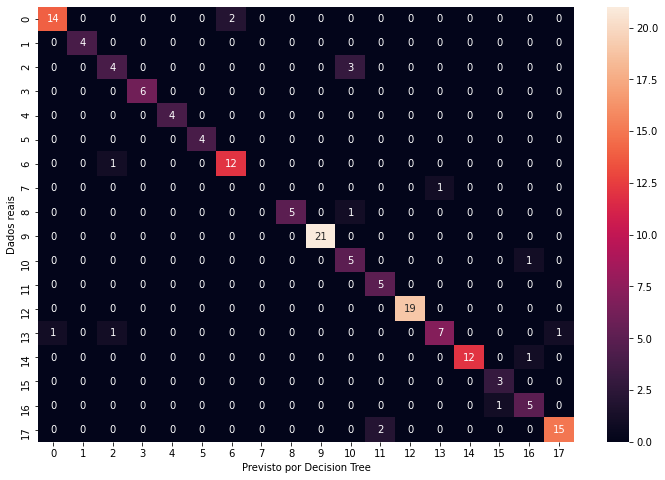

In [19]:
confusion_matrix( y_pred, y_test)

matriz_decision_tree = confusion_matrix(y_test, y_pred)
print(' ')
print ("Matriz de Confusão: \n", matriz_decision_tree)
# Para visualização:
plt.figure(figsize = (12, 8))
sns.heatmap(matriz_decision_tree, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Decision Tree')
plt.ylabel('Dados reais')
plt.show()
#  deixar a colorida

In [20]:
pd.crosstab( y_pred, y_test)

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
row_0,,,,,,,,,,,,,,,,,,
bug,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
dark,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dragon,0,0,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
electric,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fairy,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
fighting,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
fire,2,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0
ghost,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
grass,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0


In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  0  7  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  5  0]
 [ 0  0  0  0  0  0  0  0  0  0

/Users/marianacezar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

In [23]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [24]:
# definindo o modelo
classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [25]:
resultado_test = classifier.score(x_test, y_test)
resultado_test 

0.7950310559006211

https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1  Link do de cima

In [28]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]

In [29]:
from sklearn.tree import ExtraTreeClassifier

model1 = ExtraTreeClassifier () 
m = model1.fit(x_train, y_train)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [31]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.128125


In [32]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.16770186335403728


In [33]:
Resultados = []
soma = 0

In [34]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = ExtraTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_test = m.score(x_test, y_test)
    
    Resultados.append(resultado_test)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name2'])
# df1   
# m

In [35]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name2    0.9
dtype: float64 Column_Name2    0.857143
dtype: float64 Column_Name2    0.944099
dtype: float64 Column_Name2    0.023113
dtype: float64
